In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Data1.csv",index_col=0)

In [5]:
data.head()

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433


In [6]:
data.describe()

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,0.080833,-0.020522,-0.002470,0.334665,0.000431,6.514418
std,0.980853,2.037853,1.377120,0.480563,0.822436,3.316227
min,-3.027957,-7.642263,-10.562676,-0.290867,-1.602573,-1.657719
25%,-0.580769,-1.382826,-0.769064,-0.031023,-0.857480,3.810357
50%,0.066927,-0.061584,0.013847,0.068932,0.002731,6.506885
75%,0.761380,1.306438,0.807310,0.926593,0.921188,9.229580
max,2.923607,5.866535,5.422757,1.344787,1.283820,13.908104


In [7]:
dataCols = data.columns
dataCols

Index(['theta_1', 'theta_2', 'theta_3', 'theta_4', 'theta_5', 'theta_6'], dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

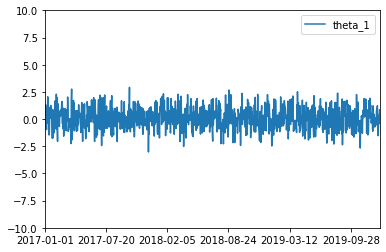

In [8]:
ax = plt.gca()
data.plot(kind='line',y='theta_1', ax=ax, ylim=[-10,10])
plt.show

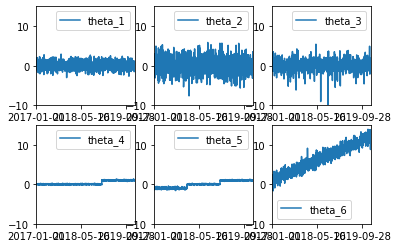

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols=3)
yLim = [-10, 15]
data.plot(kind='line',y='theta_1', ax=axes[0,0], ylim=yLim)
data.plot(kind='line',y='theta_2', ax=axes[0,1], ylim=yLim)
data.plot(kind='line',y='theta_3', ax=axes[0,2], ylim=yLim)
data.plot(kind='line',y='theta_4', ax=axes[1,0], ylim=yLim)
data.plot(kind='line',y='theta_5', ax=axes[1,1], ylim=yLim)
data.plot(kind='line',y='theta_6', ax=axes[1,2], ylim=yLim)

### // Using multiplot with the same x and y range for each subplot helps to compare columns

In [13]:
dtMelt = pd.melt(data.reset_index(), id_vars = 'index', value_vars=dataCols)
dtMelt.head()

,index,variable,value
0,2017-01-01,theta_1,0.756936
1,2017-01-02,theta_1,0.767089
2,2017-01-03,theta_1,0.404544
3,2017-01-04,theta_1,1.313957
4,2017-01-05,theta_1,0.209862


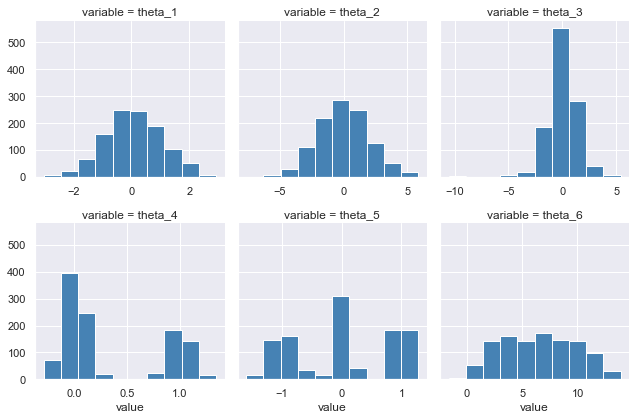

In [14]:
sns.set(style="darkgrid")
g = sns.FacetGrid(dtMelt, col="variable", sharex = False, col_wrap = 3)
g.map(plt.hist, "value", color="steelblue")

## Kernel Denisty Estimators

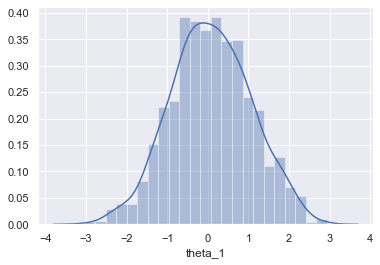

In [15]:
sns.distplot(data['theta_1'],hist=True)

## Slice 2018

In [16]:
data_slice = data.loc['2018-01-01':'2018-12-31','theta_1':'theta_4']
data_slice.head()

,theta_1,theta_2,theta_3,theta_4
2018-01-01,0.682693,-3.091767,-0.475717,-0.238530
2018-01-02,-0.283107,-0.979955,1.233933,0.158031
2018-01-03,1.572221,-2.033528,2.196317,0.041347
2018-01-04,-1.042981,0.651530,1.060125,0.064832
2018-01-05,-1.392614,-2.570905,-0.600063,-0.015025


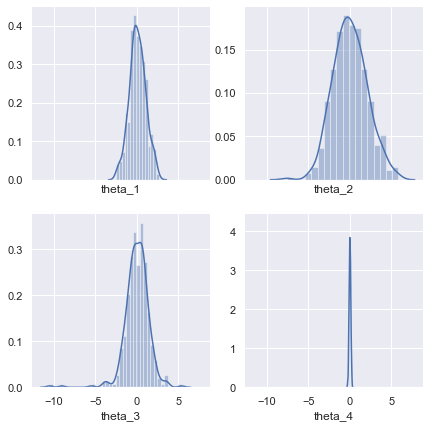

In [17]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
sns.distplot(data_slice['theta_1'],hist=True, ax=axes[0, 0])
sns.distplot(data_slice['theta_2'],hist=True, ax=axes[0, 1])
sns.distplot(data_slice['theta_3'],hist=True, ax=axes[1, 0])
sns.distplot(data_slice['theta_4'],hist=True, ax=axes[1, 1])